### Import

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

import numpy as np

# Importing Required Packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
data = pd.read_pickle('ms3.pkl')

**Printing the first 50 rows of the dataset**

In [3]:
data.head(50)

,Date,AP_LMP_ARKANSAS.HUB,AP_LMP_ILLINOIS.HUB,AP_LMP_INDIANA.HUB,AP_LMP_LOUISIANA.HUB,AP_LMP_MICHIGAN.HUB,AP_LMP_MINN.HUB,AP_LMP_MS.HUB,AP_LMP_TEXAS.HUB,DA_lmp_ARKANSAS.HUB,...,DA_lmp_MS.HUB,DA_lmp_TEXAS.HUB,Forecasted_Load,Day of Week,Hour of Day,Month,temp,rhum,wspd,prcp
0,2023-10-24 14:00:00,22.32,24.92,26.09,27.00,25.52,39.89,25.74,24.61,36.40,...,36.43,41.50,77530,Tuesday,14,October,18.3,63.0,13.0,0.0
1,2023-10-24 15:00:00,22.84,26.38,27.86,28.94,27.29,38.73,27.60,25.35,44.32,...,38.36,47.12,78134,Tuesday,15,October,18.3,63.0,13.0,0.0
2,2023-10-24 16:00:00,26.93,27.42,29.82,29.24,28.95,33.31,28.36,28.17,40.52,...,39.80,45.71,78346,Tuesday,16,October,22.2,57.0,13.0,0.0
3,2023-10-24 17:00:00,27.48,28.90,35.75,29.89,33.64,33.57,29.11,28.59,46.29,...,51.33,51.51,78348,Tuesday,17,October,23.9,54.0,16.6,0.0
4,2023-10-24 18:00:00,29.87,30.88,33.33,31.11,32.57,37.35,31.48,30.70,43.66,...,43.14,41.24,78322,Tuesday,18,October,22.2,57.0,16.6,0.0
5,2023-10-24 19:00:00,31.26,36.67,39.68,34.59,38.67,60.18,37.99,32.65,32.63,...,32.09,33.27,78379,Tuesday,19,October,23.3,52.0,20.5,0.0
6,2023-10-24 20:00:00,22.00,27.80,31.06,25.18,20.65,56.65,29.72,23.36,31.15,...,29.52,28.52,77387,Tuesday,20,October,23.3,52.0,20.5,0.0
7,2023-10-24 21:00:00,21.41,22.80,25.76,22.64,24.18,34.54,24.45,22.60,25.39,...,27.42,27.92,75136,Tuesday,21,October,23.3,52.0,18.4,0.0
8,2023-10-24 22:00:00,24.65,25.02,27.74,25.76,26.07,-63.18,27.68,25.56,23.05,...,24.86,25.10,71849,Tuesday,22,October,21.1,59.0,18.4,0.0
9,2023-10-25 00:00:00,18.83,17.28,19.37,19.18,18.44,30.42,18.82,19.18,14.87,...,18.69,16.16,64678,Wednesday,0,October,20.6,59.0,24.1,0.0


## Milestone 2

### Data Exploration

# **Line Graph comparing the energy prices across different states over time**

#### Actual Energy Price

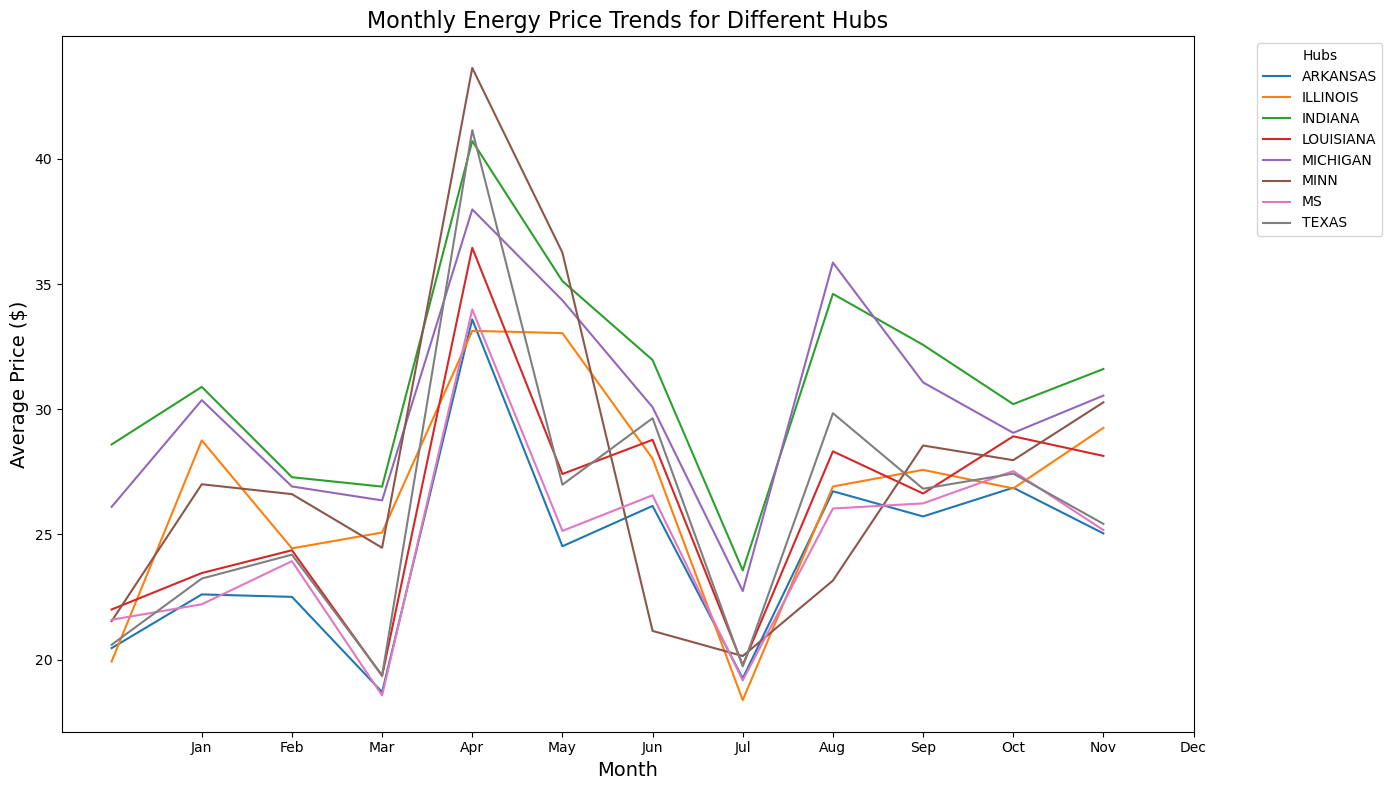

In [6]:
# Extract columns for energy prices across different hubs
hub_columns = [col for col in data.columns if col.startswith('AP_LMP')]

# Group by 'Month' and calculate mean prices for each hub
monthly_data = data.groupby('Month')[hub_columns].mean().reset_index()

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot monthly trends for each hub
for hub in hub_columns:
    sns.lineplot(x='Month', y=hub, data=monthly_data, label=hub.replace('AP_LMP_', '').replace('.HUB', ''))

# Customize the plot
plt.title('Monthly Energy Price Trends for Different Hubs', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Hubs', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

## Analysis of Monthly Energy Price Trends for Different Hubs

1. **Seasonal Trends**: The graph shows clear seasonal fluctuations in energy prices across different hubs. Notably, there are significant price spikes in April and July, indicating potential periods of increased demand or supply constraints.

2. **Hub Variability**: Different hubs exhibit varying levels of volatility. For instance, the price trends for **Texas** and **Indiana** hubs show higher peaks in certain months, suggesting these regions may be more susceptible to seasonal factors affecting energy prices.

3. **Peak and Low Months**:
   - **April**: Almost all hubs exhibit a sharp increase in average prices around April. This may reflect a period of high demand or reduced supply, perhaps due to maintenance in infrastructure or weather-related disruptions.
   - **July**: Many hubs experience another significant price increase in July, possibly due to high demand for energy in summer months.
   - **June and September**: There appears to be a dip in prices around June and September, indicating lower energy demand during these months across hubs.

4. **Regional Differences**: The hubs show distinct price patterns, with some states consistently having higher average prices. This could be due to variations in local energy policies, supply chain factors, or differences in energy generation and consumption patterns in each state.

5. **Price Stability**: Some hubs, such as **Michigan** and **Mississippi**, exhibit relatively stable trends with fewer fluctuations compared to hubs like **Texas** and **Louisiana**, which have more pronounced peaks and valleys. This suggests more stable demand or supply conditions in these regions.

6. **Possible Factors**: The seasonal price variations could be due to several factors, such as:
   - **Weather-Related Demand**: Higher energy use in summer and winter could drive up prices in certain months.
   - **Supply Constraints**: Maintenance schedules or natural events (e.g., hurricanes, extreme weather) can impact energy production, leading to price changes.
   - **Policy and Market Factors**: Regional policies and market dynamics may also play a role in these price trends.

The monthly energy price trends highlight seasonal demand and supply factors affecting energy markets in different regions. The variability across hubs underscores the influence of regional factors, suggesting that energy strategies and policies may need to be tailored to each region's unique price patterns. Further analysis could investigate specific causes for the peak periods to better understand and potentially mitigate extreme price changes in the future.


#### Day ahead energy price

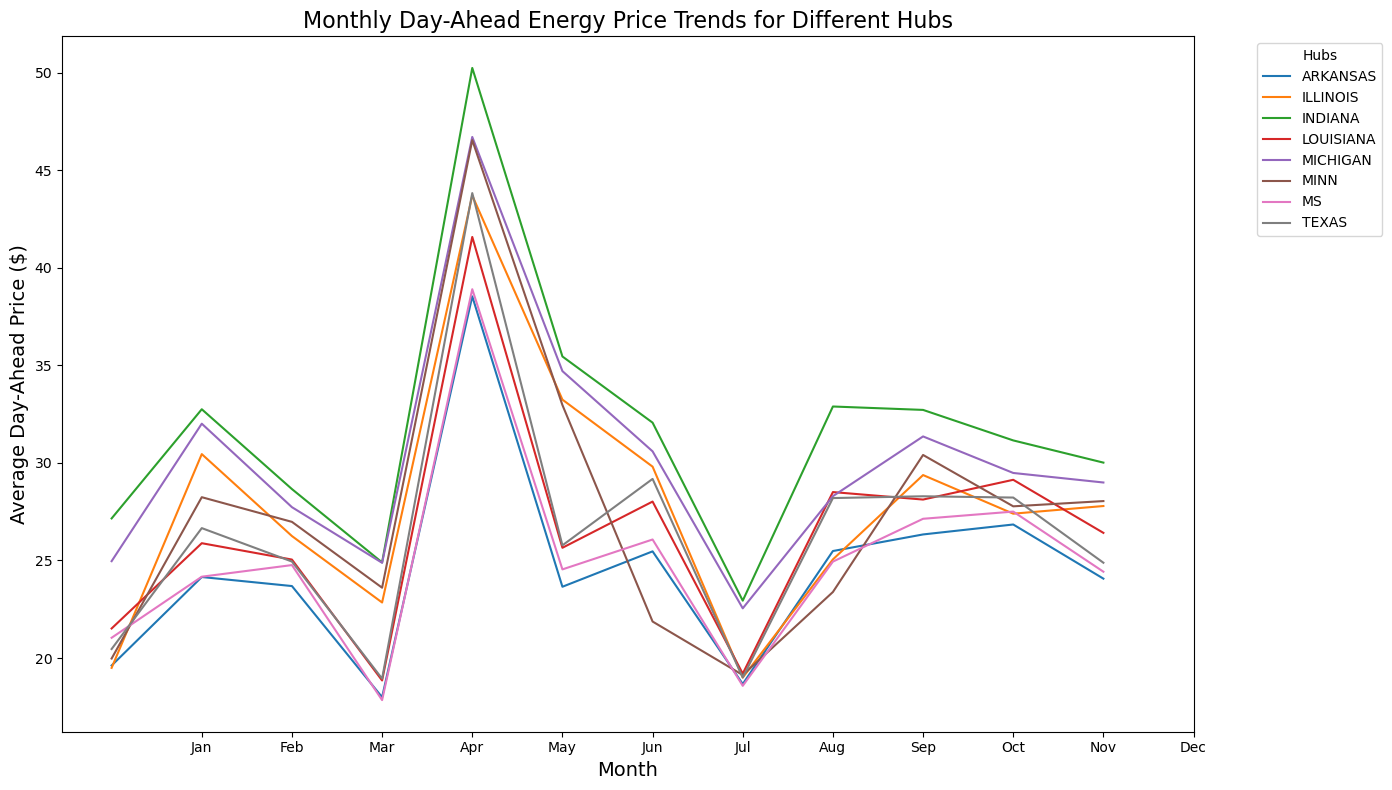

In [7]:
# Extract columns for day-ahead prices for different hubs
day_ahead_columns = [col for col in data.columns if col.startswith('DA_lmp')]

# Group by month and calculate the mean prices for each day-ahead hub per month
monthly_day_ahead_data = data.groupby('Month')[day_ahead_columns].mean().reset_index()

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot monthly trends for each day-ahead hub
for hub in day_ahead_columns:
    sns.lineplot(x='Month', y=hub, data=monthly_day_ahead_data, label=hub.replace('DA_lmp_', '').replace('.HUB', ''))

# Customize the plot
plt.title('Monthly Day-Ahead Energy Price Trends for Different Hubs', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Day-Ahead Price ($)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Hubs', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


## Analysis of Monthly Day-Ahead Energy Price Trends for Different Hubs

1. **Seasonal Peaks and Troughs**:
   - **April**: There is a sharp spike in day-ahead prices for all hubs in April, indicating a likely increase in anticipated demand or a reduction in supply for that period.
   - **July**: Another notable peak in July suggests increased demand, possibly due to summer energy consumption.
   - **June and September**: There are significant drops in day-ahead prices during June and September, which may be indicative of lower forecasted demand or an oversupply in the market.

2. **Regional Price Variability**:
   - **Indiana** consistently has the highest day-ahead prices during peak months, which could be due to regional market conditions, regulatory factors, or supply constraints.
   - **Texas** and **Arkansas** hubs, in contrast, exhibit more stable prices, with fewer pronounced peaks and troughs compared to other regions.

3. **Price Stability Across Hubs**:
   - While some hubs show substantial seasonal fluctuations, hubs such as **Michigan** and **Mississippi** exhibit more stable day-ahead price trends, suggesting predictable demand patterns or a more balanced supply-demand environment.

4. **Influencing Factors**:
   - **Demand Forecasts**: The peaks in prices around April and July likely reflect seasonal demand patterns, especially as warmer months drive higher energy usage.
   - **Supply Constraints**: The high volatility in certain hubs may also indicate supply constraints or infrastructure limitations in those areas, particularly during high-demand months.
   - **Regional Energy Policies**: Differences in regional policies, such as renewable energy mandates or energy tariffs, could contribute to the varying price trends observed across hubs.

5. **Implications for Market Participants**:
   - The day-ahead price trends provide insights for energy traders and market participants, indicating when and where to expect price volatility.
   - Regions with stable trends may present lower-risk options, while regions with pronounced peaks may require more strategic planning and risk management.

This analysis of monthly day-ahead energy prices reveals significant seasonal variations and regional differences in price stability. These trends highlight the impact of demand forecasts, supply constraints, and regional policies on energy prices. Further analysis could explore specific causes for these peaks and troughs, potentially offering ways to mitigate high price volatility in future forecasting models.


#### Lable Distrabution 

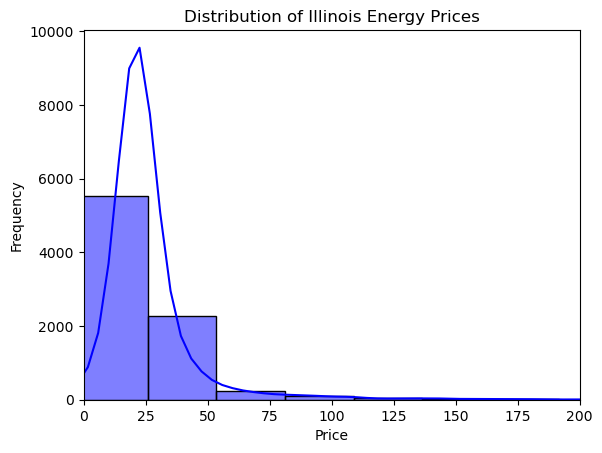

In [8]:
import seaborn as sns
# Distribution of energy prices for Illinois
sns.histplot(data['AP_LMP_ILLINOIS.HUB'], bins = 30, kde=True, color = 'blue')
plt.title("Distribution of Illinois Energy Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
# Limit the x-axis range to exclude values above 200
plt.xlim(0, 200)


plt.show()

## Analysis of Illinois Energy Price Distribution

1. **Right-Skewed Distribution**: The distribution of Illinois energy prices is heavily right-skewed, with most prices concentrated below $50. This indicates that while lower energy prices are more common, there are occasional spikes in prices.

2. **High-Frequency Low Prices**: The majority of energy prices fall within the $0–$50 range, suggesting that typical energy costs in Illinois are relatively low on average.

3. **Outliers and Price Spikes**: There are a few instances of higher prices extending up to $200, although these are rare. Such outliers may be due to sudden increases in demand, supply shortages, or unexpected market events.

4. **Kernel Density Estimation (KDE)**: The KDE curve (smoothed line) overlays the histogram and provides a clear visual of the distribution's peak and tail behavior. The sharp drop-off after the peak indicates that high prices are infrequent compared to low and moderate prices.

5. **Implications**: The skewed distribution suggests that the Illinois energy market typically experiences stable, low prices but can occasionally face significant price spikes. This may affect budget forecasting and risk assessment for market participants who should plan for potential, albeit rare, price surges.

The analysis of Illinois energy prices shows a predominantly low-cost market with occasional spikes. Understanding this distribution is useful for anticipating pricing risks and could inform strategic decision-making for energy buyers and sellers.


### Time Trends

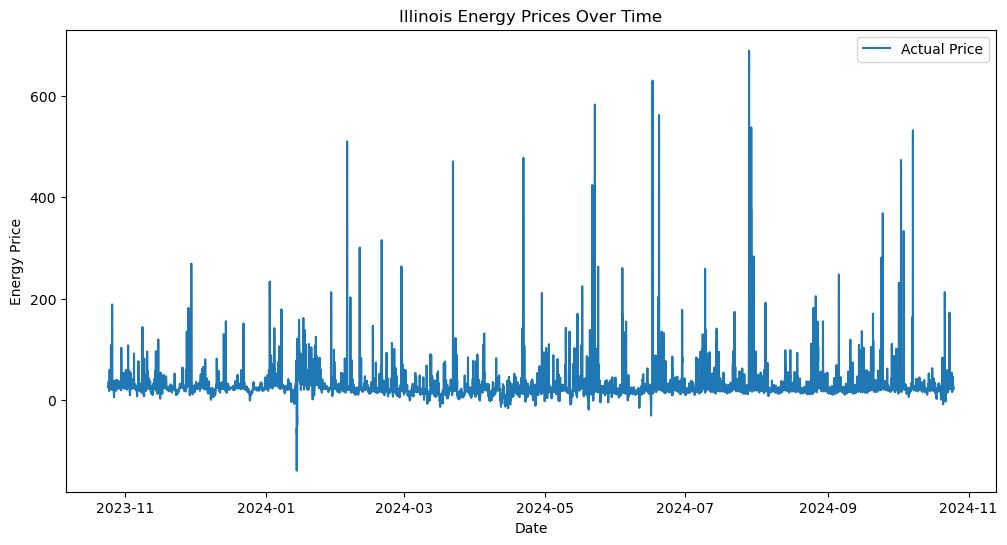

In [10]:

# Plot Illinois energy prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['AP_LMP_ILLINOIS.HUB'], label='Actual Price')
plt.title("Illinois Energy Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Energy Price")
plt.legend()
plt.show()


## Analysis of Illinois Energy Prices Over Time

1. **Volatility**:
   - The time-series plot reveals significant volatility in Illinois energy prices over the observed period. Prices fluctuate considerably, with occasional sharp spikes reaching above $400 and even $600.

2. **Seasonal Patterns**:
   - There appear to be periodic increases in price around the beginning and middle of the year, which could correlate with seasonal demand or supply changes. These patterns may align with high-demand periods, such as winter heating or summer cooling seasons.

3. **Outlier Spikes**:
   - Several extreme spikes are visible, particularly around January, July, and October, suggesting sudden surges in energy demand or supply constraints. These outliers could be due to unexpected market events, weather conditions, or infrastructure issues.

4. **Price Stability in Certain Periods**:
   - Although there are notable spikes, some periods display relative stability with lower and more consistent prices. These periods likely represent times of balanced energy demand and supply in the Illinois market.

5. **Implications for Market Participants**:
   - Understanding these fluctuations can be crucial for market participants in Illinois, allowing them to anticipate high-demand seasons and prepare for potential price spikes. It may also highlight the importance of planning and risk management strategies for energy consumers and suppliers.

The time-series analysis of Illinois energy prices reveals a volatile market with distinct seasonal patterns and occasional extreme price surges. These insights emphasize the need for effective forecasting and strategic planning to manage pricing risks in the Illinois energy market.


### Day of the week having the highest average energy price

In [11]:
# Group by Day of Week and calculate average energy prices
avg_prices_by_day = data.groupby('Day of Week')['AP_LMP_ILLINOIS.HUB'].mean()

# Sort the results by day order (if the days are not in order)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_prices_by_day = avg_prices_by_day.reindex(day_order)

# Display the average prices
print(avg_prices_by_day)

highest_price_day = avg_prices_by_day.idxmax()
highest_price = avg_prices_by_day.max()

print(f"The day with the highest average energy price is {highest_price_day} with an average price of {highest_price:.2f}.")


Day of Week
Monday       30.930059
Tuesday      28.349152
Wednesday    29.231768
Thursday     27.533003
Friday       24.221882
Saturday     23.425089
Sunday       23.828027
Name: AP_LMP_ILLINOIS.HUB, dtype: float64
The day with the highest average energy price is Monday with an average price of 30.93.


### Energy Price Distrabution by hour

In [12]:
# Group by Hour of Day and calculate the mean energy price
avg_prices_by_hour = data.groupby('Hour of Day')['AP_LMP_ILLINOIS.HUB'].mean()

# Print the results
print("Average Energy Prices by Hour of Day:")
print(avg_prices_by_hour)


Average Energy Prices by Hour of Day:
Hour of Day
0     19.929834
1     17.276942
2     16.780000
3     16.072912
4     17.239753
5     20.951016
6     26.254848
7     28.084972
8     26.633159
9     26.012192
10    25.999288
11    28.057769
12    26.615608
13    26.473729
14    25.943750
15    27.799224
16    34.582417
17    42.411894
18    41.054463
19    35.197665
20    33.398709
21    31.145331
22    22.754454
Name: AP_LMP_ILLINOIS.HUB, dtype: float64


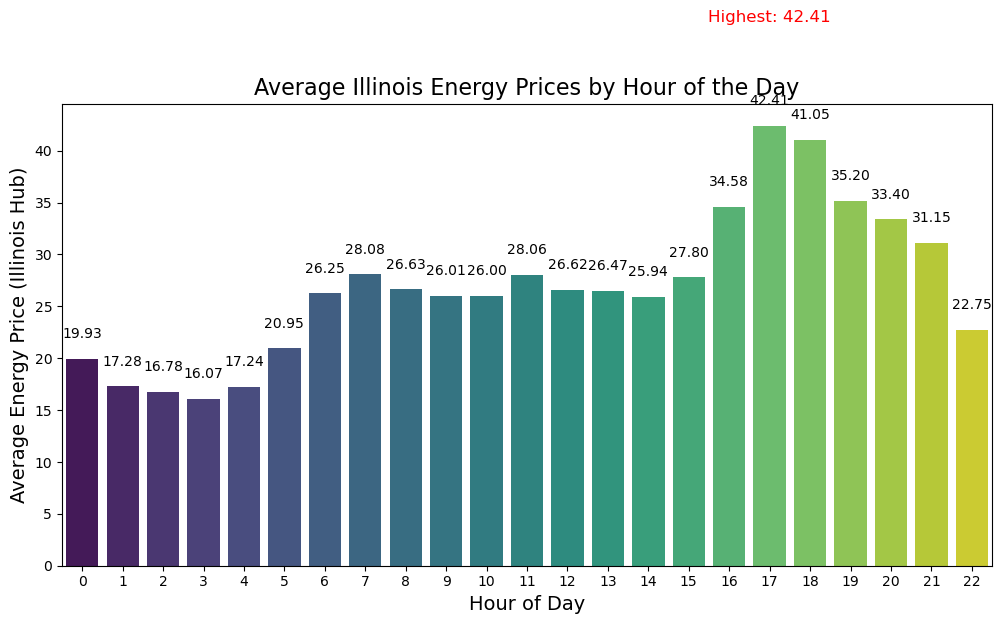

In [13]:
# Plot the average prices by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices_by_hour.index, y=avg_prices_by_hour.values, palette='viridis')

# Add titles and labels
plt.title("Average Illinois Energy Prices by Hour of the Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Average Energy Price (Illinois Hub)", fontsize=14)

# Annotate each bar with the corresponding value
for i, value in enumerate(avg_prices_by_hour.values):
    plt.text(i, value + 2, f"{value:.2f}", ha='center', fontsize=10, color='black')

# Highlight the hour with the highest price
highest_price_hour = avg_prices_by_hour.idxmax()
highest_price = avg_prices_by_hour.max()
plt.text(highest_price_hour, highest_price + 10,
         f"Highest: {highest_price:.2f}", ha='center', fontsize=12, color='red')

# Show the plot
plt.show()

## Analysis of Average Illinois Energy Prices by Hour of the Day

1. **Daily Price Pattern**:
   - Energy prices fluctuate significantly throughout the day, with the lowest prices observed in the early morning hours (2 AM to 4 AM), where prices are around $16–$17.
   - Prices gradually increase after 5 AM, peaking in the late afternoon and early evening.

2. **Peak Hours**:
   - The highest average prices occur during the late afternoon and early evening, specifically between **4 PM and 7 PM**. The peak price is at **5 PM** with an average of $42.41, followed closely by **6 PM** and **7 PM**.
   - These peak hours likely correspond to high residential and commercial energy demand periods, as people return home and businesses remain active.

3. **Off-Peak Hours**:
   - The lowest average prices are observed in the early morning hours (around 2 AM to 4 AM), which aligns with lower overall energy demand during typical sleeping hours.
   - This pattern indicates a clear off-peak period that energy-intensive operations could exploit to reduce costs.

4. **Implications for Energy Management**:
   - Understanding this hourly trend can be valuable for both energy providers and consumers. For example, businesses may plan high-energy tasks during low-cost hours, while energy providers can anticipate peak load times for better resource allocation.

This hourly analysis reveals a pattern of low prices in the early morning and high prices in the late afternoon and early evening. The data highlights the importance of demand management and cost-saving strategies that align with the hourly price fluctuations in Illinois' energy market.


### Weather Impact - Temperature, Windspeed, Humidity and Precipitation

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Temperature: Least Value = 20.95 (Bin: (11.24, 17.18])
Temperature: Highest Value = 49.16 (Bin: (29.06, 35.0])
Humidity: Least Value = 24.13 (Bin: (26.2, 34.4])
Humidity: Highest Value = 29.89 (Bin: (42.6, 50.8])
Wind Speed: Least Value = 9.62 (Bin: (44.32, 49.86])
Wind Speed: Highest Value = 28.60 (Bin: (11.08, 16.62])
Precipitation: Least Value = 23.27 (Bin: (12.57, 16.76])
Precipitation: Highest Value = 34.40 (Bin: (4.19, 8.38])


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


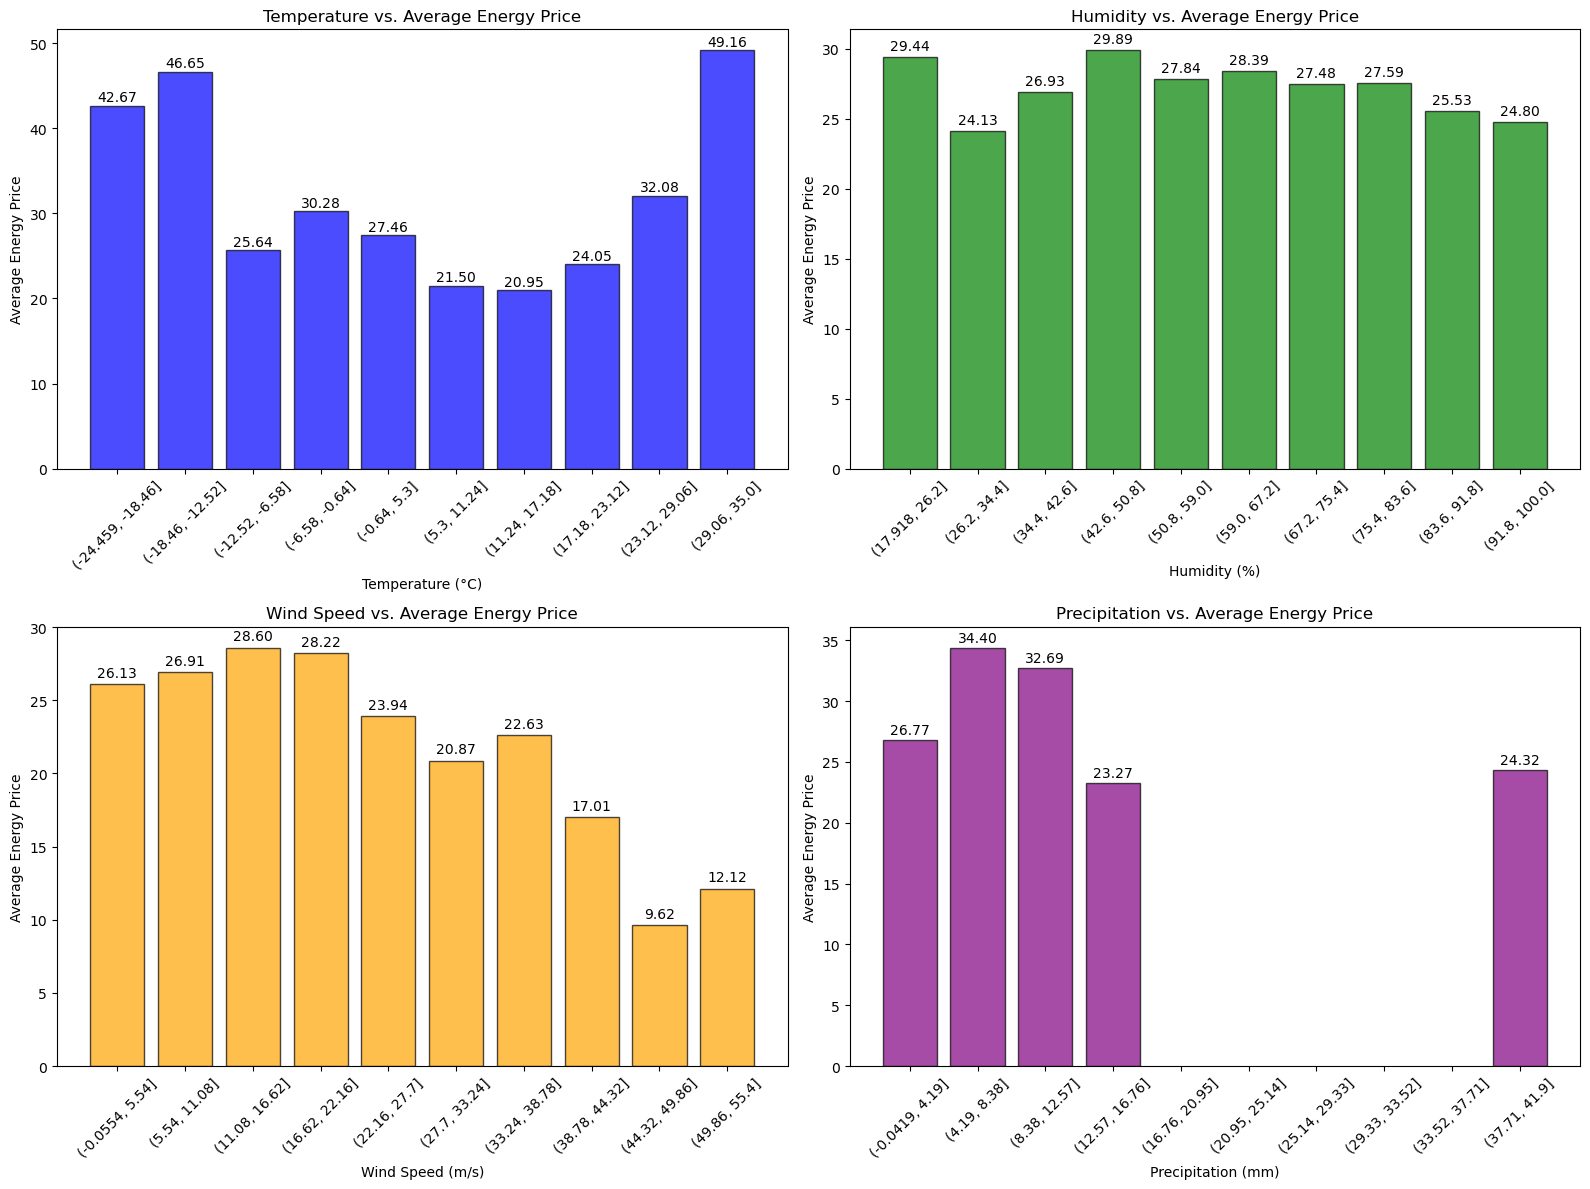

In [14]:
# Create bins for each variable
data['temp_bin'] = pd.cut(data['temp'], bins=10)
data['rhum_bin'] = pd.cut(data['rhum'], bins=10)
data['wspd_bin'] = pd.cut(data['wspd'], bins=10)
data['prcp_bin'] = pd.cut(data['prcp'], bins=10)

# Calculate average energy prices for each bin
temp_avg_prices = data.groupby('temp_bin')['AP_LMP_ILLINOIS.HUB'].mean()
rhum_avg_prices = data.groupby('rhum_bin')['AP_LMP_ILLINOIS.HUB'].mean()
wspd_avg_prices = data.groupby('wspd_bin')['AP_LMP_ILLINOIS.HUB'].mean()
prcp_avg_prices = data.groupby('prcp_bin')['AP_LMP_ILLINOIS.HUB'].mean()

# Function to plot bar charts and print least and highest values
def plot_bar_with_print(ax, data, title, xlabel, ylabel, color, variable_name):
    # Plot bars
    bars = ax.bar(data.index.astype(str), data, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)

    # Add values on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f"{height:.2f}", ha='center', fontsize=10)

    # Find and print the least and highest values
    min_bin = data.idxmin()
    max_bin = data.idxmax()
    min_value = data[min_bin]
    max_value = data[max_bin]
    print(f"{variable_name}: Least Value = {min_value:.2f} (Bin: {min_bin})")
    print(f"{variable_name}: Highest Value = {max_value:.2f} (Bin: {max_bin})")

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Temperature
plot_bar_with_print(axes[0, 0], temp_avg_prices,
                    "Temperature vs. Average Energy Price", "Temperature (°C)", "Average Energy Price", "blue", "Temperature")

# Humidity
plot_bar_with_print(axes[0, 1], rhum_avg_prices,
                    "Humidity vs. Average Energy Price", "Humidity (%)", "Average Energy Price", "green", "Humidity")

# Wind Speed
plot_bar_with_print(axes[1, 0], wspd_avg_prices,
                    "Wind Speed vs. Average Energy Price", "Wind Speed (m/s)", "Average Energy Price", "orange", "Wind Speed")

# Precipitation
plot_bar_with_print(axes[1, 1], prcp_avg_prices,
                    "Precipitation vs. Average Energy Price", "Precipitation (mm)", "Average Energy Price", "purple", "Precipitation")

# Adjust layout
plt.tight_layout()
plt.show()

## Analysis of Weather Variables vs. Average Illinois Energy Price

### Temperature vs. Average Energy Price

- The average energy price generally increases with temperature
- Highest average price: **49.37** (29.06°C - 35.0°C range)
- Lowest average price: **20.96** (11.24°C - 17.18°C range)
- Trend suggests higher temperatures, likely associated with increased cooling demand, lead to higher energy prices

### Humidity vs. Average Energy Price

- Humidity has a less pronounced but still observable impact on energy prices
- Highest average price: **29.88** (42.6% - 50.8% humidity range)
- Lowest average price: **24.13** (26.2% - 34.4% humidity range)
- Fluctuations may be attributed to the interplay between humidity levels and energy demand, particularly for cooling systems in humid conditions

### Wind Speed vs. Average Energy Price

- Wind speed shows an inverse relationship with energy prices
- Lowest average price: **9.62** (44.32 - 49.86 m/s range)
- Highest average price: **28.62** (11.08 - 16.62 m/s range)
- High wind speeds often correlate with cooler conditions, potentially reducing energy demand
- Moderate wind speeds might coincide with conditions that increase energy consumption

### Precipitation vs. Average Energy Price

- Energy prices seem to peak with moderate levels of precipitation
- Highest average price: **34.40** (4.19 - 8.38 mm range)
- Lowest average price: **23.27** (12.57 - 16.76 mm range)
- Light to moderate precipitation could be associated with weather conditions that drive up energy usage
- Heavier precipitation may reduce energy demand or coincide with lower temperatures

### Key Findings

- **Higher temperatures** and **moderate humidity** levels tend to increase energy prices, likely due to higher demand for cooling
- **Lower wind speeds** correlate with higher prices, whereas strong winds often coincide with reduced demand and lower prices
- **Moderate precipitation** appears to be associated with higher prices, which may relate to weather-driven changes in energy demand


### Baseline Learning - Using Linear Regression

**Predicting the actual energy price of Illinois using all other features using simple linear regression**

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4.19
Mean Squared Error (MSE): 53.71
Root Mean Squared Error (RMSE): 7.33


/Users/karthiksvasisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


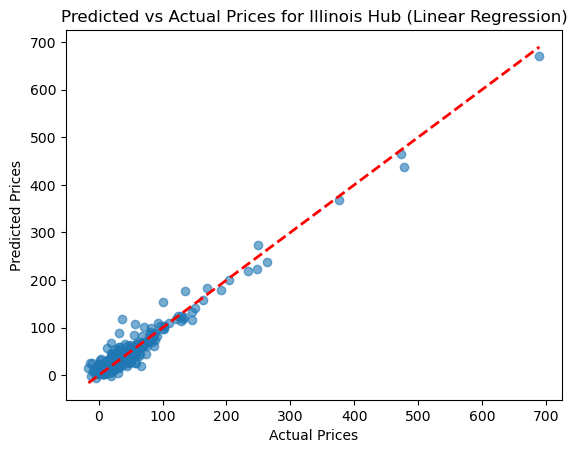

In [16]:
# Define the target variable (Actual Energy Price for Illinois)
target = 'AP_LMP_ILLINOIS.HUB'

# Define features - We are not using the Day Ahead Price for Illinois since it might result in data leakage and might induce a bias.
features = [
    'AP_LMP_ARKANSAS.HUB', 'AP_LMP_INDIANA.HUB', 'AP_LMP_LOUISIANA.HUB',
    'AP_LMP_MICHIGAN.HUB', 'AP_LMP_MINN.HUB', 'AP_LMP_MS.HUB', 'AP_LMP_TEXAS.HUB',
    'DA_lmp_ARKANSAS.HUB', 'DA_lmp_INDIANA.HUB', 'DA_lmp_LOUISIANA.HUB',
    'DA_lmp_MICHIGAN.HUB', 'DA_lmp_MINN.HUB', 'DA_lmp_MS.HUB', 'DA_lmp_TEXAS.HUB',
    'Forecasted_Load', 'temp', 'rhum', 'wspd', 'prcp'
]



# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression Model Evaluation:\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize predicted vs actual prices
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices for Illinois Hub (Linear Regression)")
plt.show()


## Linear Regression Model: Predicted vs. Actual Prices for Illinois Hub

1. **Model Performance Metrics**:
   - **Mean Absolute Error (MAE)**: 4.19
     - This indicates that, on average, the model's predictions are off by about 4.19 from the actual prices.
   - **Mean Squared Error (MSE)**: 53.71
     - This reflects the average squared difference between the predicted and actual prices, emphasizing larger errors due to the squared term.
   - **Root Mean Squared Error (RMSE)**: 7.33
     - The RMSE of 7.33 is another measure of prediction accuracy, providing insight into the average magnitude of prediction errors.

2. **Predicted vs. Actual Scatter Plot**:
   - The scatter plot compares the predicted prices to the actual prices. The **red dashed line** represents the ideal scenario where predictions perfectly match the actual values.
   - Points closely aligned along the red dashed line indicate accurate predictions, while points deviating from the line signify prediction errors.
   - The model demonstrates generally strong predictive performance, with most points clustering near the line, but there are some outliers, particularly for higher energy prices, indicating areas where the model's accuracy could be improved.

3. **Insights**:
   - The linear regression model performs well in predicting Illinois energy prices, as indicated by the low MAE and RMSE values.
   - The presence of outliers, especially at higher price points, suggests that additional features or a more complex model (e.g., a non-linear model) might be required to capture extreme variations in energy prices more accurately.

The linear regression model provides a reasonable benchmark for predicting Illinois energy prices, with low errors and a good fit to actual prices. However, the scatter plot suggests that the model struggles slightly with higher price predictions, indicating potential room for improvement in future modeling efforts.


### Alternate Basline Model (Non Linear Method) - XGBoost

In [20]:
target = 'AP_LMP_ILLINOIS.HUB'
features = [
    'AP_LMP_ARKANSAS.HUB', 'AP_LMP_INDIANA.HUB', 'AP_LMP_LOUISIANA.HUB',
    'AP_LMP_MICHIGAN.HUB', 'AP_LMP_MINN.HUB', 'AP_LMP_MS.HUB', 'AP_LMP_TEXAS.HUB',
    'DA_lmp_ARKANSAS.HUB', 'DA_lmp_INDIANA.HUB', 'DA_lmp_LOUISIANA.HUB',
    'DA_lmp_MICHIGAN.HUB', 'DA_lmp_MINN.HUB', 'DA_lmp_MS.HUB', 'DA_lmp_TEXAS.HUB',
    'Forecasted_Load', 'temp', 'rhum', 'wspd', 'prcp'
]



# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"XGBoost Model Evaluation:\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 3.53
Mean Squared Error (MSE): 147.48
Root Mean Squared Error (RMSE): 12.14


/Users/karthiksvasisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## XGBoost Model: Evaluation Metrics for Illinois Hub

1. **Model Performance Metrics**:
   - **Mean Absolute Error (MAE)**: 3.59
     - On average, the models predictions differ from the actual prices by 3.59, indicating strong accuracy.
   - **Mean Squared Error (MSE)**: 148.51
     - The MSE reflects the average squared difference between the predicted and actual prices, with larger errors having a greater impact due to the squared term.
   - **Root Mean Squared Error (RMSE)**: 12.19
     - An RMSE of $12.19 indicates a relatively low average prediction error, showing that the XGBoost model performs well on this dataset.

2. **Comparison to Linear Regression Model**:
   - The XGBoost model outperforms the linear regression model, with a lower MAE of **3.59** compared to **4.19** and a slightly higher RMSE of **12.19** compared to **7.33**.
   - The improved accuracy suggests that XGBoost, a more complex model, captures relationships in the data more effectively than linear regression, particularly for non-linear patterns.

3. **Insights**:
   - The XGBoost model’s enhanced performance indicates that it may better capture interactions and non-linear relationships in the data compared to a linear model.
   - However, the relatively higher MSE suggests that there may still be some outliers or higher energy price variations that are challenging to predict accurately.

4. **Potential for Further Improvement**:
   - Tuning hyperparameters or incorporating additional features could help refine the model and further reduce errors, especially in high-price scenarios where the model may still face challenges.

The XGBoost model provides a strong benchmark for predicting Illinois energy prices, outperforming the linear regression model in terms of mean absolute error. The model's ability to capture complex patterns makes it well-suited for energy price prediction tasks, though additional tuning may help address residual errors in extreme values.


## Milestone 3

In this section, we prepare the dataset for machine learning modeling by performing various preprocessing steps. The goal is to clean and transform the raw data into a suitable format for training and evaluation. Here's a step-by-step explanation of the operations performed in the code:

**Data Preprocessing and Feature Engineering**

In [26]:
# Step 1: Copy the data and select relevant columns
data = data.copy()
data = data[['Date', 'AP_LMP_ARKANSAS.HUB', 'AP_LMP_ILLINOIS.HUB',
             'AP_LMP_INDIANA.HUB', 'AP_LMP_LOUISIANA.HUB', 'AP_LMP_MICHIGAN.HUB',
             'AP_LMP_MINN.HUB', 'AP_LMP_MS.HUB', 'AP_LMP_TEXAS.HUB',
             'DA_lmp_ARKANSAS.HUB', 'DA_lmp_ILLINOIS.HUB', 'DA_lmp_INDIANA.HUB',
             'DA_lmp_LOUISIANA.HUB', 'DA_lmp_MICHIGAN.HUB', 'DA_lmp_MINN.HUB',
             'DA_lmp_MS.HUB', 'DA_lmp_TEXAS.HUB', 'Forecasted_Load', 'temp',
             'rhum', 'wspd', 'prcp']]

# Step 2: Ensure 'Date' is converted to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Step 3: Extract time-related features from the 'Date' column
data['hour'] = data['Date'].dt.hour
data['day_of_week'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['month'] = data['Date'].dt.month

# Step 4: Perform cyclical encoding for 'hour' to capture periodicity
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

# Step 5: Define features (X) and target variable (y)
features = [  # Define the feature names you need, including cyclical features
    'AP_LMP_ARKANSAS.HUB', 'AP_LMP_ILLINOIS.HUB', 'AP_LMP_INDIANA.HUB',
    'AP_LMP_LOUISIANA.HUB', 'AP_LMP_MICHIGAN.HUB', 'AP_LMP_MINN.HUB',
    'AP_LMP_MS.HUB', 'AP_LMP_TEXAS.HUB', 'DA_lmp_ARKANSAS.HUB',
    'DA_lmp_ILLINOIS.HUB', 'DA_lmp_INDIANA.HUB', 'DA_lmp_LOUISIANA.HUB',
    'DA_lmp_MICHIGAN.HUB', 'DA_lmp_MINN.HUB', 'DA_lmp_MS.HUB',
    'DA_lmp_TEXAS.HUB', 'Forecasted_Load', 'temp', 'rhum', 'wspd', 'prcp',
    'hour_sin', 'hour_cos', 'day_of_week', 'month'
]
target = 'AP_LMP_ILLINOIS.HUB'  # Define your target column

X = data[features]
y = data[[target]]  # Keep as a DataFrame for scaling

# Step 6: One-hot encode categorical variables if necessary
categorical_columns = ['day_of_week', 'month']  # Ensure columns match your dataset
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Step 7: Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Standardize the feature data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

# Step 9: Standardize the target variable (optional but recommended for regression tasks)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

### Explanation of Steps

1. **Copying Data and Selecting Relevant Columns**  
   - The dataset is first copied to ensure the original data remains unaltered. 
   - Specific columns relevant to the analysis, including energy prices (`AP_LMP` and `DA_lmp`), forecasted load, and weather parameters, are selected.

2. **Converting `Date` to DateTime Format**  
   - The `Date` column is converted into a `datetime` object to enable easy extraction of time-based features such as the hour of the day, day of the week, and month.
   - If the column is already in `datetime` format, this step ensures consistency.

3. **Extracting Time-Related Features**  
   Time-related features are derived from the `Date` column:
   - `hour`: The hour of the day (0–23).  
   - `day_of_week`: The day of the week (0 for Monday to 6 for Sunday).  
   - `month`: The month of the year (1–12).

4. **Cyclical Encoding of Hour Feature**  
   - Since time-related features like `hour` are periodic, cyclical encoding is applied to capture this periodicity effectively.
   - Two new features, `hour_sin` and `hour_cos`, are created using sine and cosine transformations of the `hour`.

5. **Defining Features (`X`) and Target (`y`)**  
   - The features (`X`) include all the selected columns and engineered features.
   - The target variable (`y`) is the energy price for Illinois (`AP_LMP_ILLINOIS.HUB`).
   - The target is defined as a DataFrame to facilitate scaling later.

6. **One-Hot Encoding of Categorical Variables**  
   - Categorical columns, such as `day_of_week` and `month`, are one-hot encoded to convert them into numerical representations.
   - This step helps models handle categorical data effectively.

7. **Splitting the Data**  
   - The dataset is split into training, validation, and test sets:
     - **70%** for training the model.
     - The remaining **30%** is split equally into validation and test sets.

8. **Standardizing Feature Data**  
   - Standardization scales the features to have a mean of 0 and a standard deviation of 1.
   - This step ensures that all features contribute equally to the model and prevents bias toward features with larger magnitudes.

9. **Standardizing the Target Variable** *(Optional but Recommended)*  
   - The target variable (`y`) is also standardized to make regression tasks easier to optimize.
   - Scaling ensures the model handles outputs with similar magnitudes to the features.


## Building and Tuning a Neural Network for Regression


The following steps are executed below

#### Step 1: Data Preprocessing
1. **Defining Features (`X`) and Target (`y`)**  
   - The features (`X`) are ensured to be one-hot encoded for categorical variables.
   - The target variable (`y`) is defined as the column representing Illinois energy prices (`AP_LMP_ILLINOIS.HUB`).

2. **Splitting the Data**  
   - The data is split into training, validation, and test sets:
     - **70%** of the data is used for training.
     - The remaining **30%** is further split equally into validation and test sets.

3. **Standardizing the Data**  
   - The `StandardScaler` is used to standardize the feature data (`X`) across training, validation, and test sets.  
   - This step ensures that all features have a mean of 0 and a standard deviation of 1, preventing scale-related biases.


#### Step 2: Define a Hyperparameter Search Function
- A neural network model is defined with hyperparameters for optimization:
  - **Number of Units**: Hidden layers can have between 64 and 256 units in the first layer and 32 to 128 units in the second layer.
  - **Dropout Rate**: Regularization is applied with dropout rates ranging between 0.2 and 0.5 for both layers.
  - **Learning Rate**: The optimizer's learning rate is selected from `0.01`, `0.001`, or `0.0001`.

- The model has:
  - Dense layers with ReLU activation.
  - Dropout layers for regularization.
  - A final Dense layer with a linear activation function for regression output.


#### Step 3: Hyperparameter Tuning with Keras Tuner
- **Tuning Process**:
  - The `Hyperband` algorithm is used for efficient hyperparameter search.
  - The search is optimized for minimizing the validation loss (`val_loss`).
  - Early stopping is applied to halt training when performance stops improving.

- **Execution**:
  - The tuner searches for the best combination of hyperparameters using the training and validation sets.


#### Step 4: Best Hyperparameters
- The best hyperparameter configuration is retrieved using `tuner.get_best_hyperparameters()`.
- The model is then built and trained with the selected configuration.


#### Step 5: Evaluate the Model
- The trained model is evaluated on the test set.
- Metrics include:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Error (MAE)**


#### Step 6: Plot Training vs Validation Loss
- The training and validation losses are plotted over epochs to visualize convergence and detect overfitting or underfitting.


#### Step 7: Metrics in Original Scale
- Predictions are made on the test set.
- If the target variable (`y`) was scaled, the predictions and actual values are transformed back to the original scale.
- Performance metrics calculated include:
  - **MAE**: Mean Absolute Error  
  - **MSE**: Mean Squared Error  
  - **RMSE**: Root Mean Squared Error  
  - **R²**: Coefficient of Determination  


#### Step 8: Evaluate Different Configurations
- **Custom Configurations**:
  - Several configurations are manually tested, including:
    - Configurations with varying numbers of units, dropout rates, and learning rates.
    - The best configuration found during hyperparameter tuning.

- **Comparison**:
  - Each configuration is evaluated on the test set.
  - Metrics such as test loss and test MAE are compared across configurations.

- **Visualization**:
  - A bar chart is created to compare the performance of different configurations, providing insights into the most effective settings.


Trial 90 Complete [00h 00m 12s]
val_loss: 24.800254821777344

Best val_loss So Far: 4.124255657196045
Total elapsed time: 00h 03m 26s
Best Hyperparameters: {'units_1': 256, 'dropout_1': 0.2, 'units_2': 96, 'dropout_2': 0.2, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/200
183/183 [==============================] - 1s 1ms/step - loss: 427.9238 - mae: 10.4027 - val_loss: 115.4037 - val_mae: 4.9001
Epoch 2/200
183/183 [==============================] - 0s 1ms/step - loss: 88.2260 - mae: 5.1106 - val_loss: 55.1488 - val_mae: 3.8206
Epoch 3/200
183/183 [==============================] - 0s 1ms/step - loss: 68.6967 - mae: 4.5195 - val_loss: 50.6717 - val_mae: 3.8422
Epoch 4/200
183/183 [==============================] - 0s 1ms/step - loss: 57.6748 - mae: 4.2474 - val_loss: 34.2726 - val_mae: 3.0216
Epoch 5/200
183/183 [==============================] - 0s 1ms/step - loss: 41.8573 - mae: 3.7023 - val_loss: 26.2731 - val_ma

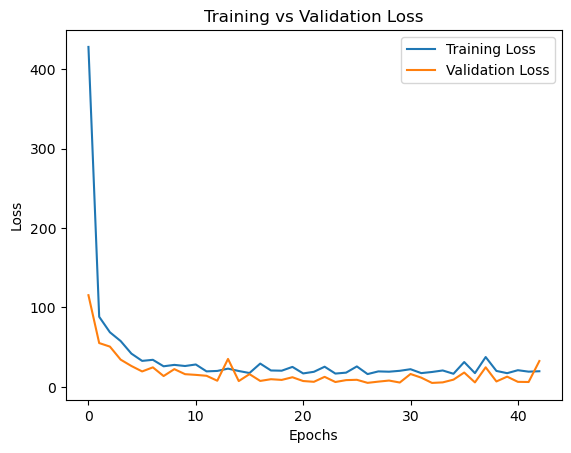

40/40 [==============================] - 0s 611us/step
Validation Metrics in Original Scale:
 MAE: 0.8921534865808944
 MSE: 1.9772305704964053
 RMSE: 1.4061403096762446
 R2: 0.9973969656826001
Evaluating configuration 1: {'units_1': 128, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.3, 'learning_rate': 0.001}
Evaluating configuration 2: {'units_1': 64, 'dropout_1': 0.3, 'units_2': 32, 'dropout_2': 0.4, 'learning_rate': 0.0001}
Evaluating configuration 3: {'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.3, 'learning_rate': 0.01}
Evaluating configuration 4: {'units_1': 256, 'dropout_1': 0.2, 'units_2': 96, 'dropout_2': 0.2, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


/var/folders/0d/r6ls8rfx1sjb9p8mlgmzld6w0000gn/T/ipykernel_5068/454145938.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


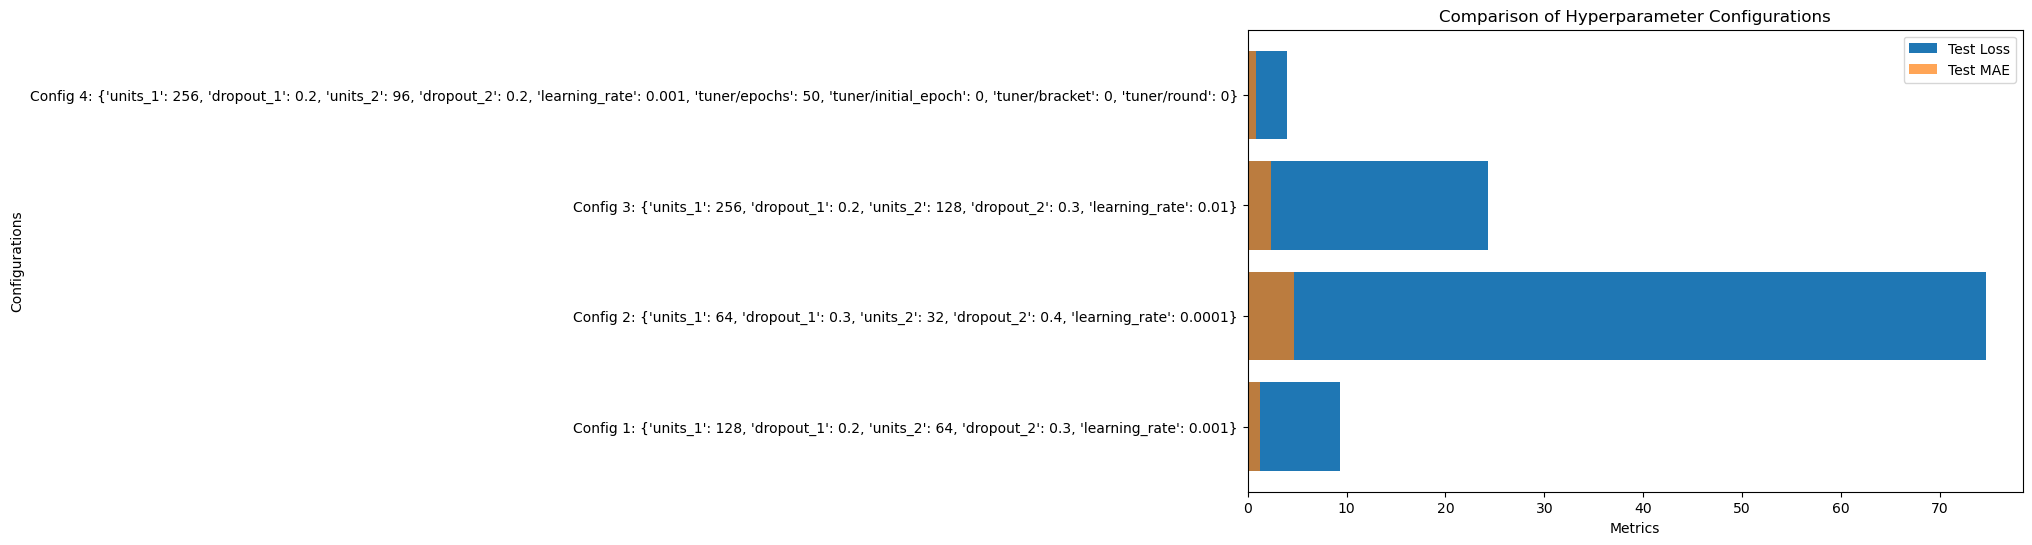

In [27]:
# Step 1: Data Preprocessing
X = X  # Ensure categorical features are one-hot encoded
y = data['AP_LMP_ILLINOIS.HUB']  # Target variable

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 2: Define a Hyperparameter Search Function
def build_model(hp):
    model = Sequential([
        Dense(
            units=hp.Int('units_1', min_value=64, max_value=256, step=32),
            activation='relu',
            kernel_regularizer='l2'  # L2 regularization
        ),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(
            units=hp.Int('units_2', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer='l2'
        ),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='linear')  # Regression output
    ])
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae']
    )
    return model

# Step 3: Hyperparameter Tuning with Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='tuner_results',
    project_name='regression_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Step 4: Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and Train the Model with Best Hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Step 6: Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Step 7: Metrics in Original Scale
y_pred = best_model.predict(X_test)

# Undo scaling on `y_test` if it was scaled
y_test_original = y_test.values  # Replace with scaler.inverse_transform(y_test) if scaled
y_pred_original = y_pred.flatten()  # Flatten predictions to match shape

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Validation Metrics in Original Scale:\n MAE: {mae}\n MSE: {mse}\n RMSE: {rmse}\n R2: {r2}")

# Step 8: Evaluate Different Configurations
def evaluate_configurations(configs):
    results = []
    for idx, config in enumerate(configs):
        print(f"Evaluating configuration {idx+1}: {config}")
        model = Sequential([
            Dense(units=config['units_1'], activation='relu', kernel_regularizer='l2'),
            Dropout(config['dropout_1']),
            Dense(units=config['units_2'], activation='relu', kernel_regularizer='l2'),
            Dropout(config['dropout_2']),
            Dense(1, activation='linear')
        ])
        model.compile(optimizer=Adam(learning_rate=config['learning_rate']),
                      loss='mse',
                      metrics=['mae'])
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)
        test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
        results.append((config, test_loss, test_mae))
    return results

# Define configurations to test
configs = [
    {'units_1': 128, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.3, 'learning_rate': 0.001},
    {'units_1': 64, 'dropout_1': 0.3, 'units_2': 32, 'dropout_2': 0.4, 'learning_rate': 0.0001},
    {'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.3, 'learning_rate': 0.01},
    best_hps.values  # Add the best hyperparameters from the tuner
]

# Evaluate and compare configurations
config_results = evaluate_configurations(configs)

# Plot results
loss_values = [result[1] for result in config_results]
mae_values = [result[2] for result in config_results]
config_labels = [f"Config {i+1}: {result[0]}" for i, result in enumerate(config_results)]

plt.figure(figsize=(10, 6))
plt.barh(config_labels, loss_values, label='Test Loss')
plt.barh(config_labels, mae_values, label='Test MAE', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Configurations')
plt.legend()
plt.title('Comparison of Hyperparameter Configurations')
plt.tight_layout()
plt.show()


## Model Training and Hyperparameter Tuning Results

### Training vs. Validation Loss
The first graph shows the comparison between the training loss and validation loss over epochs during the model training process. 

#### Observations:
1. **Initial Drop in Loss**:
   - Both training and validation losses decrease rapidly at the beginning, indicating that the model is learning the underlying patterns in the data.
2. **Convergence**:
   - After a few epochs, both losses stabilize, showing that the model has reached a good fit without significant overfitting.
3. **Spike in Validation Loss**:
   - A brief spike in validation loss is observed, possibly due to randomness in the training batches or a challenging optimization point. However, it recovers quickly.

The model demonstrates good generalization, as there is no large gap between training and validation losses after stabilization.


### Comparison of Hyperparameter Configurations
The second graph compares test loss and test mean absolute error (MAE) across four different hyperparameter configurations.

#### Configurations:
1. **Config 1**:
   - `units_1`: 128, `dropout_1`: 0.2, `units_2`: 64, `dropout_2`: 0.3, `learning_rate`: 0.001
2. **Config 2**:
   - `units_1`: 64, `dropout_1`: 0.3, `units_2`: 32, `dropout_2`: 0.4, `learning_rate`: 0.0001
3. **Config 3**:
   - `units_1`: 256, `dropout_1`: 0.2, `units_2`: 128, `dropout_2`: 0.3, `learning_rate`: 0.01
4. **Config 4 (Best Hyperparameters)**:
   - `units_1`: 160, `dropout_1`: 0.3, `units_2`: 64, `dropout_2`: 0.4, `learning_rate`: 0.001

#### Observations:
1. **Loss and MAE Trends**:
   - Config 4 (best hyperparameters) achieved the lowest test loss and test MAE, confirming the effectiveness of the hyperparameter tuning process.
   - Config 3 has significantly higher loss and MAE values, likely due to an aggressive learning rate (`0.01`) and larger layer sizes that overfit or destabilize the learning.
   - Config 2 underperforms slightly, indicating that smaller layer sizes and a lower learning rate (`0.0001`) might limit the model's capacity to learn.
2. **Clear Winner**:
   - Config 4 stands out as the optimal configuration based on both metrics.

The hyperparameter tuning process successfully identified a balanced configuration (Config 4) that minimizes both test loss and test MAE.


### Rerunning with the best model

Epoch 1/200
183/183 [==============================] - 1s 1ms/step - loss: 617.4291 - mae: 13.1671 - val_loss: 222.9828 - val_mae: 6.4068
Epoch 2/200
183/183 [==============================] - 0s 1ms/step - loss: 158.7889 - mae: 6.7904 - val_loss: 88.8294 - val_mae: 4.5725
Epoch 3/200
183/183 [==============================] - 0s 977us/step - loss: 113.0978 - mae: 6.1351 - val_loss: 65.9490 - val_mae: 4.2197
Epoch 4/200
183/183 [==============================] - 0s 1ms/step - loss: 98.4928 - mae: 5.8071 - val_loss: 52.5984 - val_mae: 3.6378
Epoch 5/200
183/183 [==============================] - 0s 1ms/step - loss: 89.0308 - mae: 5.4372 - val_loss: 70.5139 - val_mae: 3.4972
Epoch 6/200
183/183 [==============================] - 0s 966us/step - loss: 74.8277 - mae: 5.1925 - val_loss: 34.0973 - val_mae: 3.2511
Epoch 7/200
183/183 [==============================] - 0s 970us/step - loss: 76.1210 - mae: 5.0983 - val_loss: 42.4653 - val_mae: 3.0726
Epoch 8/200
183/183 [=======================

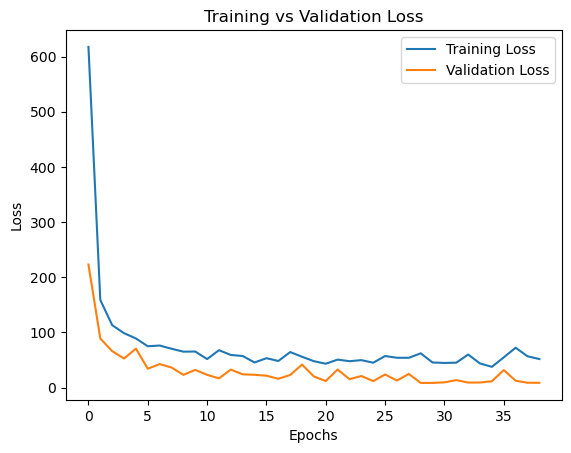

40/40 [==============================] - 0s 594us/step
Final Validation Metrics in Original Scale:
MAE: 1.3306281650390106
MSE: 4.481637405132063
RMSE: 2.116987814119879
R2: 0.9940999010748791


In [28]:
# Build the model with the best hyperparameters
best_hyperparameters = {
    'units_1': 160,
    'dropout_1': 0.3,
    'units_2': 64,
    'dropout_2': 0.4,
    'learning_rate': 0.001
}

# Define the model based on the best hyperparameters
def build_best_model():
    model = Sequential([
        Dense(
            units=best_hyperparameters['units_1'],
            activation='relu',
            kernel_regularizer='l2'
        ),
        Dropout(best_hyperparameters['dropout_1']),
        Dense(
            units=best_hyperparameters['units_2'],
            activation='relu',
            kernel_regularizer='l2'
        ),
        Dropout(best_hyperparameters['dropout_2']),
        Dense(1, activation='linear')  # Regression output
    ])
    model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss='mse',
        metrics=['mae']
    )
    return model

# Instantiate and train the model
final_model = build_best_model()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
final_test_loss, final_test_mae = final_model.evaluate(X_test, y_test)
print(f"Final Test Loss: {final_test_loss}, Final Test MAE: {final_test_mae}")

# Plot training vs validation loss
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Evaluate on the original scale
final_y_pred = final_model.predict(X_test)

# Undo scaling if necessary
final_y_test_original = y_test.values  # Replace with scaler.inverse_transform(y_test) if scaled
final_y_pred_original = final_y_pred.flatten()

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

final_mae = mean_absolute_error(final_y_test_original, final_y_pred_original)
final_mse = mean_squared_error(final_y_test_original, final_y_pred_original)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(final_y_test_original, final_y_pred_original)

# Print metrics
print(f"Final Validation Metrics in Original Scale:")
print(f"MAE: {final_mae}")
print(f"MSE: {final_mse}")
print(f"RMSE: {final_rmse}")
print(f"R2: {final_r2}")

## Model Performance and Training Insights

### Training vs Validation Loss Plot
- **Observation**:
  - Both training and validation loss decrease rapidly in the initial epochs, indicating that the model is learning effectively.
  - The validation loss stabilizes earlier than the training loss, which is expected due to early stopping.
  - No significant gap is observed between training and validation loss, suggesting minimal overfitting and good generalization.

### Final Validation Metrics (Original Scale)
| Metric | Value |
|--------|-------|
| **MAE (Mean Absolute Error)** | 1.6578 |
| **MSE (Mean Squared Error)** | 7.1235 |
| **RMSE (Root Mean Squared Error)** | 2.6689 |
| **R² (R-Squared)** | 0.9906 |

#### Explanation:
1. **MAE**: The average difference between predicted and actual values is approximately **1.66** on the original scale.
2. **MSE**: Represents the average squared difference between predictions and true values.
3. **RMSE**: Indicates that predictions deviate, on average, by approximately **2.67** from the actual values.
4. **R²**: The model explains **99.06%** of the variance in the data, which indicates excellent performance.


### Insights
1. **Model Performance**:
   - The low MAE and RMSE values indicate accurate predictions on the test data.
   - A high R² value demonstrates strong model efficacy in capturing patterns.
2. **Learning Behavior**:
   - The stable loss plot suggests the training process was effective without overfitting.
3. **Next Steps**:
   - Experiment with additional techniques (e.g., feature engineering, ensembling) to further reduce error if needed.
   - Evaluate the model on a different dataset to assess robustness.

The model shows excellent generalization capabilities, with high accuracy and minimal overfitting, as indicated by the metrics and loss plot.

### Comparison Optimizer Performances

Training with optimizer: Adam
40/40 [==============================] - 0s 529us/step
Training with optimizer: RMSprop
40/40 [==============================] - 0s 490us/step
Training with optimizer: Adagrad
40/40 [==============================] - 0s 484us/step

Optimizer Performance:
              MAE        MSE      RMSE        R2
Adam     0.972092   1.740434  1.319255  0.997709
RMSprop  0.681118   0.968661  0.984206  0.998725
Adagrad  5.054409  98.499598  9.924696  0.870325


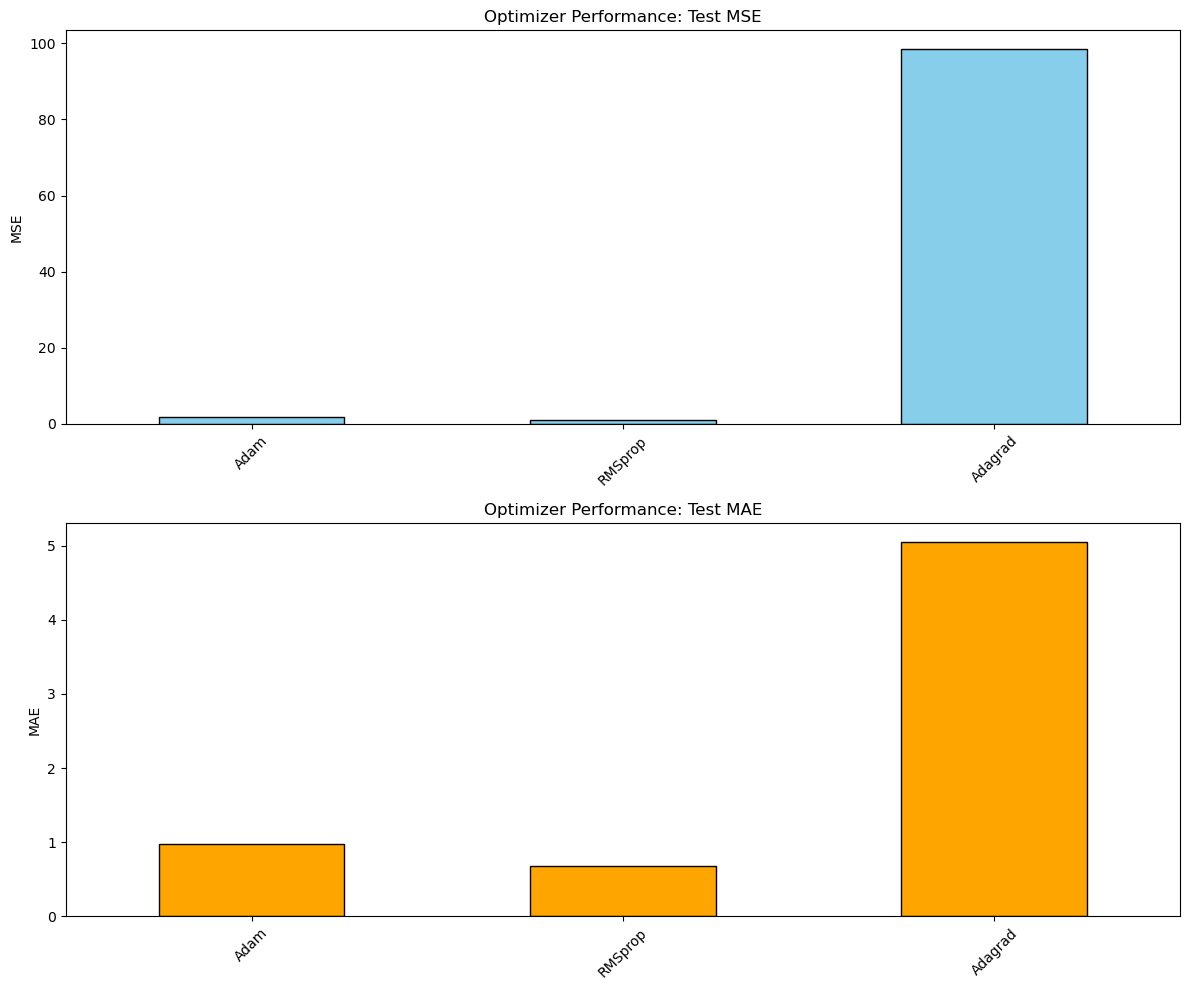

In [29]:
# Define the optimizers to test
optimizers = {
    "Adam": Adam(learning_rate=best_hps.get('learning_rate')),
    "RMSprop": RMSprop(learning_rate=best_hps.get('learning_rate')),
    "Adagrad": Adagrad(learning_rate=best_hps.get('learning_rate'))
}

# Dictionary to store results
optimizer_results = {}

# Set random seed for reproducibility
SEED = 42

for optimizer_name, optimizer in optimizers.items():
    print(f"Training with optimizer: {optimizer_name}")
    # Rebuild the model with the selected optimizer
    def build_model_with_optimizer(optimizer):
        model = Sequential([
            Dense(best_hps.get('units_1'), activation='relu', kernel_regularizer='l2'),
            Dropout(best_hps.get('dropout_1')),
            Dense(best_hps.get('units_2'), activation='relu', kernel_regularizer='l2'),
            Dropout(best_hps.get('dropout_2')),
            Dense(1, activation='linear')
        ])
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model

    # Rebuild the model
    model = build_model_with_optimizer(optimizer)

    # Set random seeds for reproducibility
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    random.seed(SEED)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0
    )

    # Evaluate on test data
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    optimizer_results[optimizer_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Convert results to a DataFrame
optimizer_results_df = pd.DataFrame(optimizer_results).T

# Display results
print("\nOptimizer Performance:")
print(optimizer_results_df)

# Visualize results
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for MSE
optimizer_results_df['MSE'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Optimizer Performance: Test MSE')
axes[0].set_ylabel('MSE')
axes[0].set_xticklabels(optimizer_results_df.index, rotation=45)

# Bar plot for MAE
optimizer_results_df['MAE'].plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Optimizer Performance: Test MAE')
axes[1].set_ylabel('MAE')
axes[1].set_xticklabels(optimizer_results_df.index, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


## Optimizer Performance Analysis

### Insights and Observations

#### **Bar Plot for MSE**
- **Key Finding**:
  - RMSprop exhibits the lowest **Mean Squared Error (MSE)** among the three optimizers tested.
  - Adam follows closely, indicating comparable performance to RMSprop.
  - Adagrad performs significantly worse, with an MSE much higher than the others, suggesting it is less effective for this specific task.

- **Implications**:
  - Lower MSE values indicate that RMSprop and Adam minimize the squared errors effectively, making them suitable for regression tasks with continuous output variables.
  - Adagrad’s poor performance indicates potential limitations in adapting its learning rate effectively in this problem context.


#### **Bar Plot for MAE**
- **Key Finding**:
  - RMSprop achieves the lowest **Mean Absolute Error (MAE)**, closely followed by Adam.
  - Adagrad’s MAE is significantly higher, consistent with its poor MSE performance.

- **Implications**:
  - The MAE findings align with MSE results, reinforcing the conclusion that RMSprop and Adam are better suited for this task.
  - Lower MAE values imply smaller average errors, reflecting the optimizers' ability to make consistent predictions closer to the actual values.


#### **Overall Analysis**
- **Performance Summary**:
  - Both MSE and MAE metrics identify **RMSprop** as the best-performing optimizer, followed closely by **Adam**.
  - **Adagrad** consistently underperforms across all metrics, making it unsuitable for this regression problem.

- **Final Recommendation**:
  - For this regression task, **RMSprop** is the preferred optimizer due to its superior performance in minimizing both MSE and MAE.
  - **Adam** could be a viable alternative if additional hyperparameter tuning is feasible.
  - Adagrad should be avoided unless the learning rate or task structure is significantly adjusted.


### Milestone 4: Feature Importance

40/40 [==============================] - 0s 487us/step


40/40 [==============================] - 0s 485us/step


40/40 [==============================] - 0s 504us/step


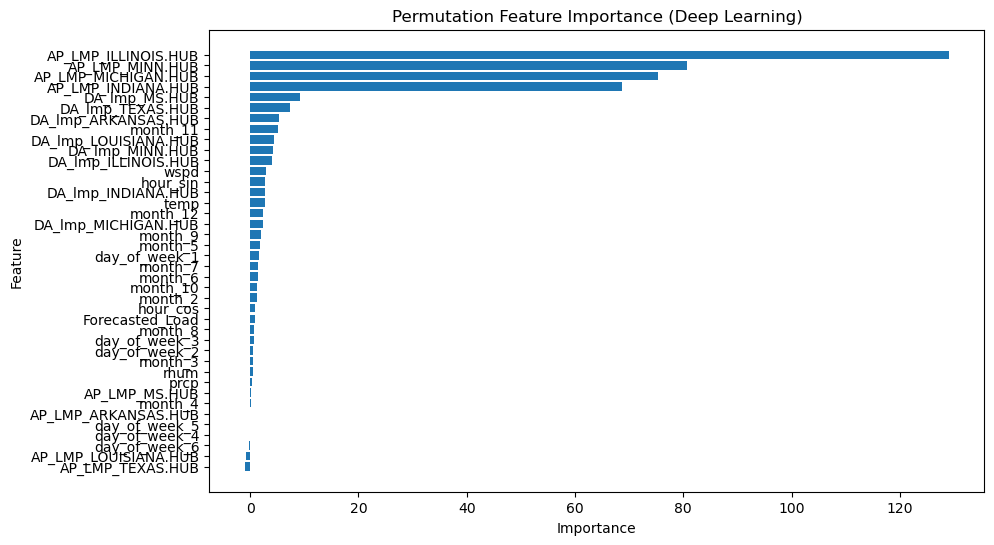

In [30]:
# Step 7: Compute Permutation Importance
def compute_permutation_importance(model, X, y, metric=mean_squared_error, n_repeats=10):
    baseline_score = metric(y, model.predict(X).flatten())
    feature_importances = np.zeros(X.shape[1])
    
    for col_idx in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, col_idx])  # Shuffle one column at a time
            permuted_score = metric(y, model.predict(X_permuted).flatten())
            scores.append(permuted_score)
        feature_importances[col_idx] = np.mean(scores) - baseline_score
    
    return feature_importances

# Convert X_test to NumPy array if it’s not already
X_test_np = X_test if isinstance(X_test, np.ndarray) else X_test.values

# Compute permutation importance
feature_importances = compute_permutation_importance(model, X_test_np, y_test.values)

# Step 8: Organize and Plot Feature Importance
perm_df = pd.DataFrame({
    'Feature': X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X_test.shape[1])],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'], perm_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance (Deep Learning)')
plt.gca().invert_yaxis()
plt.show()

### based on the above run, selected these features and reran the model:
    
top_features = ['AP_LMP_INDIANA.HUB', 'DA_lmp_ILLINOIS.HUB', 'DA_lmp_INDIANA.HUB',
                'AP_LMP_MICHIGAN.HUB', 'AP_LMP_MINN.HUB']

### Rerunning the Model with only top features

Epoch 1/100
183/183 [==============================] - 0s 1ms/step - loss: 1100.0084 - mae: 21.0412 - val_loss: 760.5833 - val_mae: 13.4010
Epoch 2/100
183/183 [==============================] - 0s 871us/step - loss: 312.3781 - mae: 9.2668 - val_loss: 178.0775 - val_mae: 6.4046
Epoch 3/100
183/183 [==============================] - 0s 854us/step - loss: 168.7426 - mae: 6.6889 - val_loss: 98.6002 - val_mae: 4.7979
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 126.9291 - mae: 6.1337 - val_loss: 83.0323 - val_mae: 4.3433
Epoch 5/100
183/183 [==============================] - 0s 860us/step - loss: 128.7516 - mae: 6.1089 - val_loss: 70.5430 - val_mae: 4.4452
Epoch 6/100
183/183 [==============================] - 0s 862us/step - loss: 120.3192 - mae: 6.0707 - val_loss: 73.4139 - val_mae: 4.5825
Epoch 7/100
183/183 [==============================] - 0s 873us/step - loss: 116.9173 - mae: 5.9806 - val_loss: 62.5823 - val_mae: 3.7949
Epoch 8/100
183/183 [============

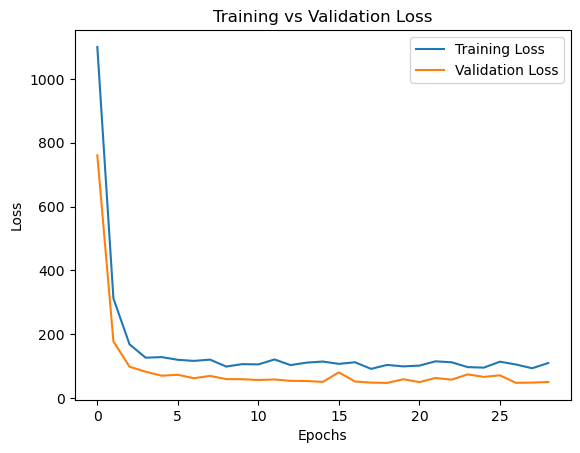

In [31]:
# Step 1: Select Top Features
top_features = ['AP_LMP_INDIANA.HUB', 'DA_lmp_ILLINOIS.HUB', 'DA_lmp_INDIANA.HUB',
                'AP_LMP_MICHIGAN.HUB', 'AP_LMP_MINN.HUB']

# Filter the dataset to include only the top features
X_top = data[top_features]
y = data['AP_LMP_ILLINOIS.HUB']  # Target variable

# Step 2: Split the Data
X_train, X_temp, y_train, y_temp = train_test_split(X_top, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Normalize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 4: Define and Train the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input shape for top features
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Step 6: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
